In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import gmaps
from config import g_api_key

In [58]:
COVID_econ_df = pd.read_csv("COVID_econ.csv")

The correlation between cases and SP500 closing price is -0.1
The correlation between cases and SP500 volume is -0.34
The correlation between cases and Dow_Jones_Industrial_Average closing price is -0.12
The correlation between cases and Dow_Jones_Industrial_Average volume is -0.55
The correlation between cases and NASDAQ closing price is -0.04
The correlation between cases and NASDAQ volume is -0.58
The correlation between cases and Russell2000 closing price is -0.28
The correlation between cases and Russell2000 volume is -0.34


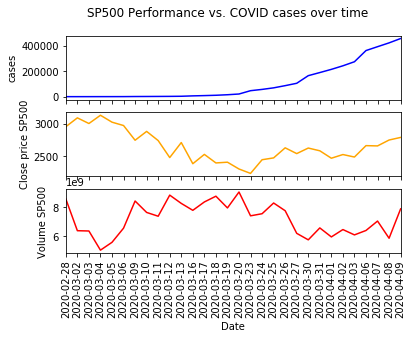

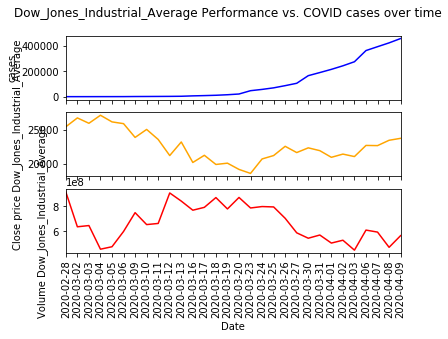

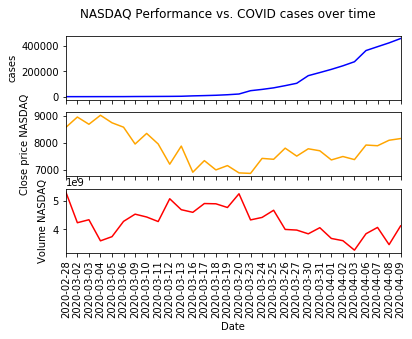

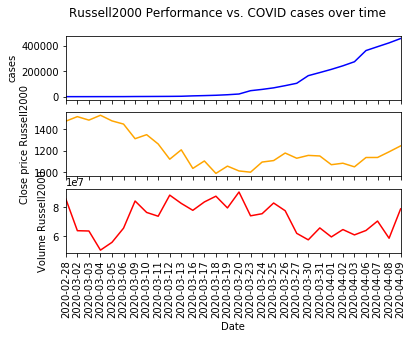

In [3]:
indicators = ["SP500", "Dow_Jones_Industrial_Average", "NASDAQ", "Russell2000"]

for indicator in indicators:
    fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
    fig.suptitle(f"{indicator} Performance vs. COVID cases over time")

    ax1.plot(COVID_econ_df["Date"], COVID_econ_df["Total Cases"], color="blue")
    ax1.set_ylabel("cases")

    ax2.plot(COVID_econ_df["Date"], COVID_econ_df[f"Close_{indicator}"], color="orange")
    ax2.set_ylabel(f"Close price {indicator}")

    ax3.plot(COVID_econ_df["Date"], COVID_econ_df[f"Volume_{indicator}"], color="red")
    ax3.set_ylabel(f"Volume {indicator}")

    plt.xlim(min(COVID_econ_df["Date"]), max(COVID_econ_df["Date"]))
    plt.xlabel("Date")
    plt.xticks(rotation="vertical")
    
    correlation = sts.pearsonr(COVID_econ_df["Total Cases"], COVID_econ_df[f"Close_{indicator}"])
    correlation2 = sts.pearsonr(COVID_econ_df["Total Cases"], COVID_econ_df[f"Volume_{indicator}"])
    
    print(f"The correlation between cases and {indicator} closing price is {round(correlation[0],2)}")
    print(f"The correlation between cases and {indicator} volume is {round(correlation2[0],2)}")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text xticklabel objects>)

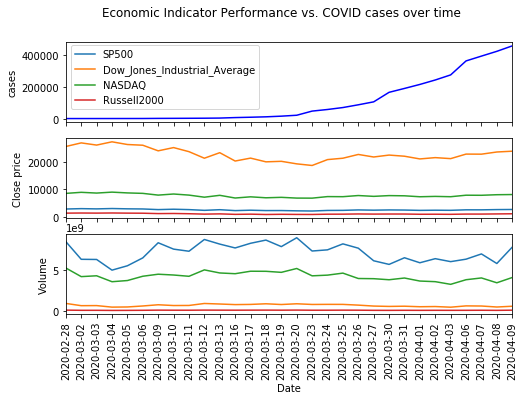

In [60]:
indicators = ["SP500", "Dow_Jones_Industrial_Average", "NASDAQ", "Russell2000"]


fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(8,5))
fig.suptitle(f"Economic Indicator Performance vs. COVID cases over time")

ax1.plot(COVID_econ_df["Date"], COVID_econ_df["Total Cases"], color="blue")
ax1.set_ylabel("cases")

for indicator in indicators:
    ax2.plot(COVID_econ_df["Date"], COVID_econ_df[f"Close_{indicator}"], label=f"{indicator}")
    ax2.set_ylabel("Close price")
    ax2.legend(loc="upper left", bbox_to_anchor=(0,2.225))

    ax3.plot(COVID_econ_df["Date"], COVID_econ_df[f"Volume_{indicator}"], label=f"{indicator}")
    ax3.set_ylabel("Volume")

plt.xlim(min(COVID_econ_df["Date"]), max(COVID_econ_df["Date"]))
plt.xlabel("Date")
plt.xticks(rotation="vertical")

In [23]:
states_df = pd.read_csv("state_unempoyment_rate.csv")

locations = states_df[["latitude", "longitude"]]

gmaps.configure(api_key=g_api_key)
fig1 = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=states_df["2008"],
                                dissipating=False, max_intensity=max(states_df["2008"]),
                                point_radius=5)
fig1.add_layer(heat_layer)

fig1

Figure(layout=FigureLayout(height='420px'))

In [21]:
fig2 = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=states_df["2009"],
                                dissipating=False, max_intensity=max(states_df["2009"]),
                                point_radius=5)
fig2.add_layer(heat_layer)

symbol_layer = gmaps.symbol_layer(locations, fill_color="blue",
                                 stroke_color="blue", scale=2,
                                 info_box_content= [f"Average Unemployment Rate of 2009: {rate}%" for rate in states_df["2009"]])

fig2.add_layer(symbol_layer)
fig2

Figure(layout=FigureLayout(height='420px'))

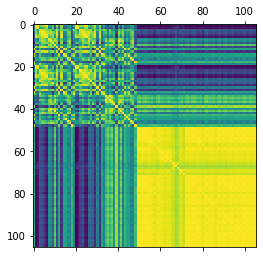

In [4]:
construction_unemployment_rate_df = pd.read_csv("construction_unemployment_rate.csv")
plt.matshow(construction_unemployment_rate_df.corr())